In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.collections import LineCollection

rng = np.random.default_rng(seed=0)

In [2]:
cos_list = [np.cos(x * 2 * np.pi / 5) for x in np.arange(5)]
sin_list = [np.sin(x * 2 * np.pi / 5) for x in np.arange(5)]

offsets = np.array([.2, .2, .2, .2, .2])

In [4]:
class Line:
    # a*x + b*y = c
    def __init__(self, a, b, c, grid):
        self.a = a
        self.b = b
        self.c = c
        self.grid = grid

    # Build function to get lines that hit boundaries
    # Maybe use build intersection function and use a line for each boundary!!!???
    def determine_intersection(self, other_line):
        denom = (self.a * other_line.b) - (other_line.a * self.b)
        if denom == 0:
            return False
        else:
            x = (other_line.b * self.c) - (self.b * other_line.c)
            x = x / denom

            y = (self.a * other_line.c) - (other_line.a * self.c)
            y = y / denom

            return (x, y)

# Using standard form, a and b are the cos, sin list, while c is k

In [17]:
l1 = Line(cos_list[1], sin_list[1], offsets[1] + 0, 1)


In [32]:
b1 = Line(0, 1, 5, 0)
b2 = Line(0, 1, -5, 0)
b3 = Line(1, 0, 5, 0)
b4 = Line(1, 0, -5, 0)

i1 = l1.determine_intersection(b1)
i2 = l1.determine_intersection(b2)
i3 = l1.determine_intersection(b3)
i4 = l1.determine_intersection(b4)

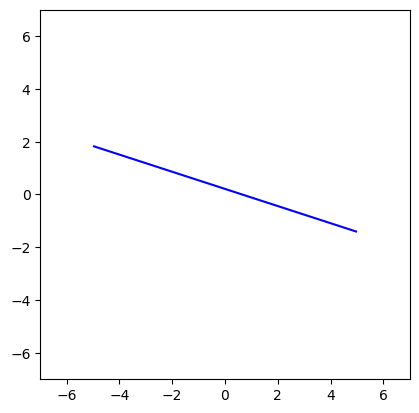

In [30]:
lines = [[i1, i2]]
colors = ["blue", "green", "yellow", "orange", "red"]

fig, ax = plt.subplots()
ax.add_collection(LineCollection(lines, colors = colors))

ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)
ax.set_aspect('equal')
plt.show()

In [35]:
boundary = [Line(0, 1, 5, 0), Line(0, 1, -5, 0), Line(1, 0, 5, 0), Line(1, 0, -5, 0)]

points = []
for b in boundary:
    intersection = l1.determine_intersection(b)
    if np.abs(intersection[0]) <= 5 and np.abs(intersection[1]) <= 5:
        points.append(intersection)

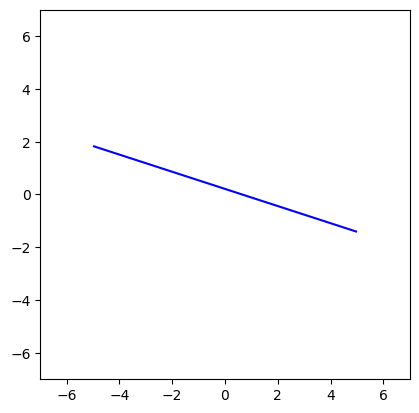

In [37]:
lines = [points]
colors = ["blue", "green", "yellow", "orange", "red"]

fig, ax = plt.subplots()
ax.add_collection(LineCollection(lines, colors = colors))

ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)
ax.set_aspect('equal')
plt.show()

In [64]:
grids = []
for i, (s, c, o) in enumerate(zip(sin_list, cos_list, offsets)):
    for k in np.arange(-3, 4):
        grids.append(Line(c, s, o + k, i))

In [65]:
boundary = [Line(0, 1, 5, 0), Line(0, 1, -5, 0), Line(1, 0, 5, 0), Line(1, 0, -5, 0)]

lines = []

for l in grids:
    points = []
    for b in boundary:
        intersection = l.determine_intersection(b)
        if intersection:
            if np.abs(intersection[0]) <= 5 and np.abs(intersection[1]) <= 5:
                points.append(intersection)
    lines.append(points)

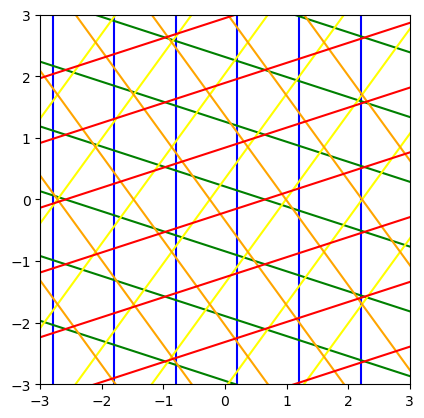

In [66]:
colors = ["blue", "green", "yellow", "orange", "red"]
colors = np.repeat(colors, len(lines) / 5)

fig, ax = plt.subplots()
ax.add_collection(LineCollection(lines, colors = colors))

ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_aspect('equal')
plt.show()

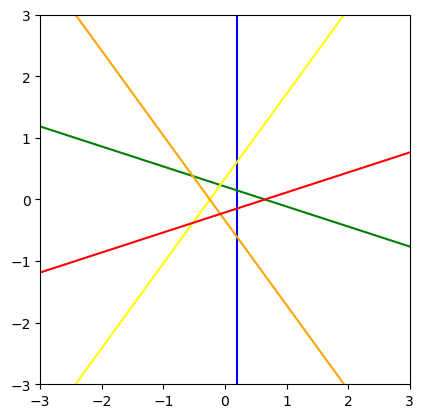

In [79]:
grids = []
for i, (s, c, o) in enumerate(zip(sin_list, cos_list, offsets)):
    for k in np.arange(1):
        grids.append(Line(c, s, o + k, i))

boundary = [Line(0, 1, 5, 0), Line(0, 1, -5, 0), Line(1, 0, 5, 0), Line(1, 0, -5, 0)]

lines = []

for l in grids:
    points = []
    for b in boundary:
        intersection = l.determine_intersection(b)
        if intersection:
            if np.abs(intersection[0]) <= 5 and np.abs(intersection[1]) <= 5:
                points.append(intersection)
    lines.append(points)

colors = ["blue", "green", "yellow", "orange", "red"]
colors = np.repeat(colors, len(lines) / 5)

fig, ax = plt.subplots()
ax.add_collection(LineCollection(lines, colors = colors))

ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_aspect('equal')
plt.show()

In [91]:
from itertools import combinations
from collections import defaultdict

intersections = defaultdict(set)
for pair in combinations(grids, 2):
    l1 = pair[0]
    l2 = pair[1]
    intersection = l1.determine_intersection(l2)
    if intersection:
        intersections[intersection].update([l1, l2])

defaultdict(set,
            {(0.2, 0.1453085056010722): {<__main__.Line at 0x1c1e579b6d0>,
              <__main__.Line at 0x1c1e579b760>},
             (0.2, 0.6155367074350505): {<__main__.Line at 0x1c1e579b6d0>,
              <__main__.Line at 0x1c1e579b7c0>},
             (0.2, -0.6155367074350508): {<__main__.Line at 0x1c1e579b6d0>,
              <__main__.Line at 0x1c1e579b850>},
             (0.2, -0.14530850560107222): {<__main__.Line at 0x1c1e579b6d0>,
              <__main__.Line at 0x1c1e579b8b0>},
             (-0.076393202250021,
              0.23511410091698928): {<__main__.Line at 0x1c1e579b760>, <__main__.Line at 0x1c1e579b7c0>},
             (-0.5236067977499789,
              0.3804226065180615): {<__main__.Line at 0x1c1e579b760>, <__main__.Line at 0x1c1e579b850>},
             (0.6472135954999583,
              -7.083090850113273e-17): {<__main__.Line at 0x1c1e579b760>, <__main__.Line at 0x1c1e579b8b0>},
             (-0.24721359549995794,
              2.918393927

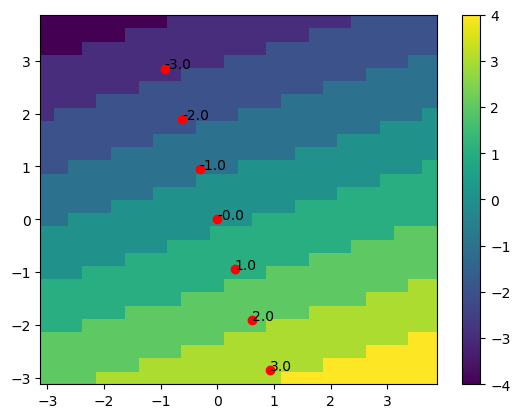

In [145]:
def determine_K(c, x, s, y, o):
    return np.ceil(c * x + s * y - o)

grid = 4
lb = -3
ub = 4

points_x = [cos_list[grid] * x for x in np.arange(lb, ub)]
points_y = [sin_list[grid] * y for y in np.arange(lb, ub)]
points_label = [determine_K(cos_list[grid], x, sin_list[grid], y, offsets[grid]) for x, y in zip(points_x, points_y)]

X, Y = np.meshgrid(np.arange(lb, ub, .25), np.arange(lb, ub, .25))
Z = np.zeros(X.shape)

for i in range(X.shape[0]):
   for j in range(X.shape[1]):
       Z[i,j] = determine_K(cos_list[grid], X[i,j], sin_list[grid], Y[i,j], offsets[grid])

for x, y, l in zip(points_x, points_y, points_label):
    plt.text(x, y, l)

plt.pcolor(X, Y, Z)
plt.colorbar()
plt.scatter(points_x, points_y, color='red')
plt.show()

In [147]:
for k, v in intersections.items():
    grid_numbers = []
    for l in v:
        grid_numbers.append(l.grid)
    print(k, grid_numbers)

(0.2, 0.1453085056010722) [0, 1]
(0.2, 0.6155367074350505) [2, 0]
(0.2, -0.6155367074350508) [0, 3]
(0.2, -0.14530850560107222) [4, 0]
(-0.076393202250021, 0.23511410091698928) [2, 1]
(-0.5236067977499789, 0.3804226065180615) [3, 1]
(0.6472135954999583, -7.083090850113273e-17) [4, 1]
(-0.24721359549995794, 2.918393927182259e-17) [2, 3]
(-0.5236067977499791, -0.38042260651806137) [4, 2]
(-0.07639320225002108, -0.23511410091698928) [4, 3]


In [230]:
this_intersection = list(intersections.keys())[6]
grid_numbers = []
for l in v:
    grid_numbers.append(l.grid)
grid_numbers.sort()

ks = [determine_K(c, this_intersection[0], s, this_intersection[1], o) for c, s, o in zip(cos_list, sin_list, offsets)]

print(ks)
print(grid_numbers)
print(this_intersection)


[1.0, 1.0, -0.0, -0.0, 1.0]
[3, 4]
(0.6472135954999583, -7.083090850113273e-17)


In [167]:
for r in range(len(grid_numbers) + 1):
    for intersection_grids in combinations(grid_numbers, r):
        this_k = ks.copy()
        for grid in intersection_grids:
            this_k[grid] += 1
        print(this_k)

[0.0, 0.0, -0.0, -0.0, -0.0]
[0.0, 0.0, -0.0, 1.0, -0.0]
[0.0, 0.0, -0.0, -0.0, 1.0]
[0.0, 0.0, -0.0, 1.0, 1.0]


In [181]:
points = []
for r in range(len(grid_numbers) + 1):
    for intersection_grids in combinations(grid_numbers, r):
        this_k = ks.copy()
        for grid in intersection_grids:
            this_k[grid] += 1
        
        point = np.array([0, 0], dtype=float)
        for k, c, s in zip(this_k, cos_list, sin_list):
            point += k * np.array([c, s])
        points.append(point)

In [197]:
# sort points
mean_x = np.mean([x[0] for x in points])
mean_y = np.mean([y[1] for y in points])

angles = []
for point in points:
    angles.append(np.arctan2(point[1] - mean_y, point[0] - mean_x))

polygon = [point for _, point in sorted(zip(angles, points))]

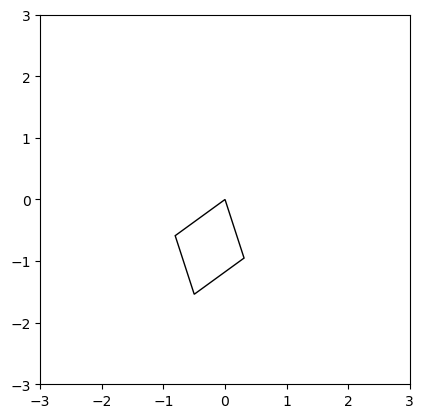

In [211]:
from matplotlib.patches import Polygon

p = Polygon(polygon, facecolor = 'w', edgecolor="k")

fig,ax = plt.subplots()

ax.add_patch(p)
ax.set_xlim([-3,3])
ax.set_ylim([-3,3])
ax.set_aspect('equal')
plt.show()

In [220]:
polygons = []
for intersection, lines in intersections.items():
    grid_numbers = []
    for l in lines:
        grid_numbers.append(l.grid)

    ks = [determine_K(c, intersection[0], s, intersection[1], o) for c, s, o in zip(cos_list, sin_list, offsets)]
    print(f'k: {ks}')

    points = []
    for r in range(len(grid_numbers) + 1):
        for intersection_grids in combinations(grid_numbers, r):
            this_k = ks.copy()
            for grid in intersection_grids:
                this_k[grid] += 1
            
            print(intersection_grids)
            print(this_k)

            point = np.array([0, 0], dtype=float)
            for k, c, s in zip(this_k, cos_list, sin_list):
                point += k * np.array([c, s])
            points.append(point)

    mean_x = np.mean([x[0] for x in points])
    mean_y = np.mean([y[1] for y in points])

    angles = []
    for point in points:
        angles.append(np.arctan2(point[1] - mean_y, point[0] - mean_x))

    polygon = [point for _, point in sorted(zip(angles, points))]
    polygons.append(polygon)

#polygons

k: [0.0, 0.0, -0.0, -0.0, -0.0]
()
[0.0, 0.0, -0.0, -0.0, -0.0]
(0,)
[1.0, 0.0, -0.0, -0.0, -0.0]
(1,)
[0.0, 1.0, -0.0, -0.0, -0.0]
(0, 1)
[1.0, 1.0, -0.0, -0.0, -0.0]
k: [0.0, 1.0, -0.0, -0.0, -0.0]
()
[0.0, 1.0, -0.0, -0.0, -0.0]
(2,)
[0.0, 1.0, 1.0, -0.0, -0.0]
(0,)
[1.0, 1.0, -0.0, -0.0, -0.0]
(2, 0)
[1.0, 1.0, 1.0, -0.0, -0.0]
k: [0.0, -0.0, -0.0, 0.0, 1.0]
()
[0.0, -0.0, -0.0, 0.0, 1.0]
(0,)
[1.0, -0.0, -0.0, 0.0, 1.0]
(3,)
[0.0, -0.0, -0.0, 1.0, 1.0]
(0, 3)
[1.0, -0.0, -0.0, 1.0, 1.0]
k: [0.0, -0.0, -0.0, -0.0, 0.0]
()
[0.0, -0.0, -0.0, -0.0, 0.0]
(4,)
[0.0, -0.0, -0.0, -0.0, 1.0]
(0,)
[1.0, -0.0, -0.0, -0.0, 0.0]
(4, 0)
[1.0, -0.0, -0.0, -0.0, 1.0]
k: [-0.0, 1.0, 0.0, -0.0, -0.0]
()
[-0.0, 1.0, 0.0, -0.0, -0.0]
(2,)
[-0.0, 1.0, 1.0, -0.0, -0.0]
(1,)
[-0.0, 2.0, 0.0, -0.0, -0.0]
(2, 1)
[-0.0, 2.0, 1.0, -0.0, -0.0]
k: [-0.0, 1.0, 1.0, -0.0, -0.0]
()
[-0.0, 1.0, 1.0, -0.0, -0.0]
(3,)
[-0.0, 1.0, 1.0, 1.0, -0.0]
(1,)
[-0.0, 2.0, 1.0, -0.0, -0.0]
(3, 1)
[-0.0, 2.0, 1.0, 1.0, -0.0]
k

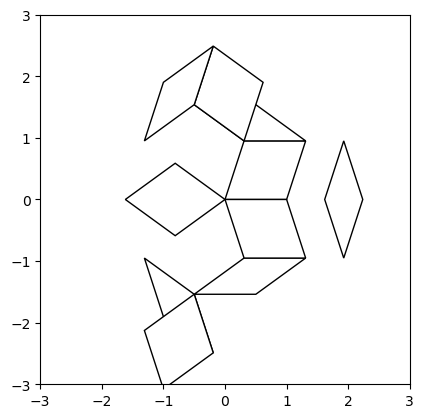

In [219]:
fig,ax = plt.subplots()

for polygon in polygons:
    p = Polygon(polygon, facecolor = 'w', edgecolor="k")
    ax.add_patch(p)
    
ax.set_xlim([-3,3])
ax.set_ylim([-3,3])
ax.set_aspect('equal')
plt.show()

In [ ]:
# need to figure out how to label all of this
# The base line ks are off, 5 should start at all 0's then 5 should have one 1
# Probably the ks are off because it's on a line and sometimes lands on either side
# so find the two k options for the lines that intersect and use them instead of +1

# This might be wrong, go back through a label everything nicely